In [47]:
# Calcula un índice por país de vulnerabilidad socioeconómica

# Importamos librerías
import numpy as np
import pandas as pd
import geopandas as gpd
import geoviews as gv
from scipy import stats

# Parámetros de mapas
gv.extension("matplotlib")
def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.9*b, w, 0.05*h])
options = { "colorbar": True, "linewidth": 0.4,
    "hooks": [hook], "ylim":(-62,85), "xlim":(-180,180),
    "colorbar_opts": {"orientation": "horizontal"} }
options_m = { "bgcolor": "lightgray", "fontscale": 2, "aspect": 2.25 }

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [48]:
# Datos

# Códigos nacionales
ix  = "ISO_A3"

# Carpetas
path_r = "../results/"

# Catálogo de datos
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
df_c = pd.read_csv(path_catalog)

# Mapa
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries_mod" )
borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]

# Océano
ocean_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_ocean" )
ocean = gv.Polygons( gpd.read_file(ocean_path), vdims = "min_zoom"
    ).opts( linewidth = 0, cmap = "Paired")

# Tabla base
iso = "../../Bases_de_datos/Country_ISO_code.csv"
df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso = df_iso.drop( ["ATA", "ATF", "HMD", "SJM", "SXM", "VAT",
    "BVT", "SGS", "UMI", "ESH", "TKL", "IOT"] )
df_iso.index.name = ix

# Nombres de variables a usar
vars = [
    "Mean years of schooling",
    "Scientific articles per million inhabitants",
    "Young workforce ratio (20-39 to 40-65 years old)",
    "Gender inequality index",
    "Total debt service [% of GNI]",
    "Central government debt [% of GDP]",
    "Gini coefficient"
    ]
var_i = [v + "_index" for v in vars]

min: 1.3, max: 14.3


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Mean years of schooling)
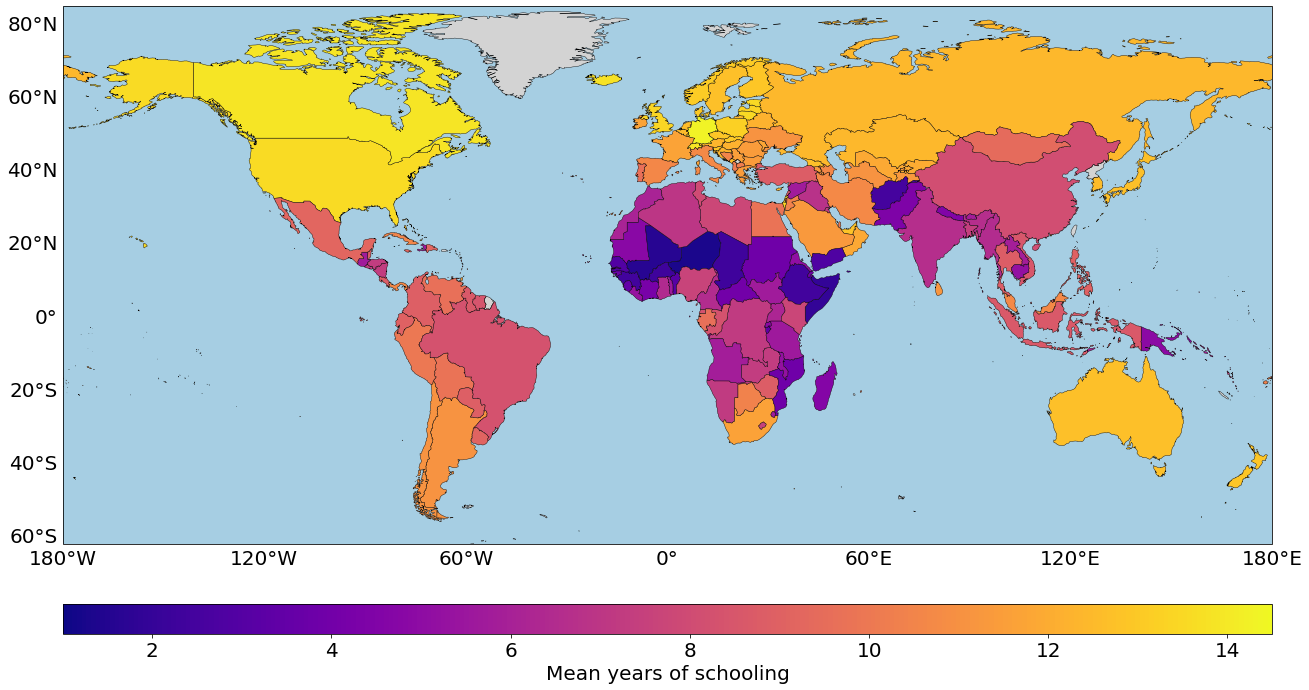

Sin datos: 48 países


,Name,Mean years of schooling
ISO_A3,,
NER,Niger,1.3
MLI,Mali,1.6
SOM,Somalia,1.9
BFA,Burkina Faso,2.3
TCD,Chad,2.3
GIN,Guinea,2.4
ETH,Ethiopia,2.4
AFG,Afghanistan,2.5
YEM,Yemen,2.8


In [49]:
# Primeras dos categorías
id = "GDI_HDI"

# Cargamos el archivo
df = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = ix ).drop(columns = ["Source"])


# Mean years of schooling
i = 0

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
# Eliminamos Mónaco por motivos de visualización
#borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
# borders[vars[i]].dropna().sort_values()
min = 1
max = 14.5
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

min: 0.8823044714212364, max: 2691.0194858628133


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Scientific articles per million inhabitants)
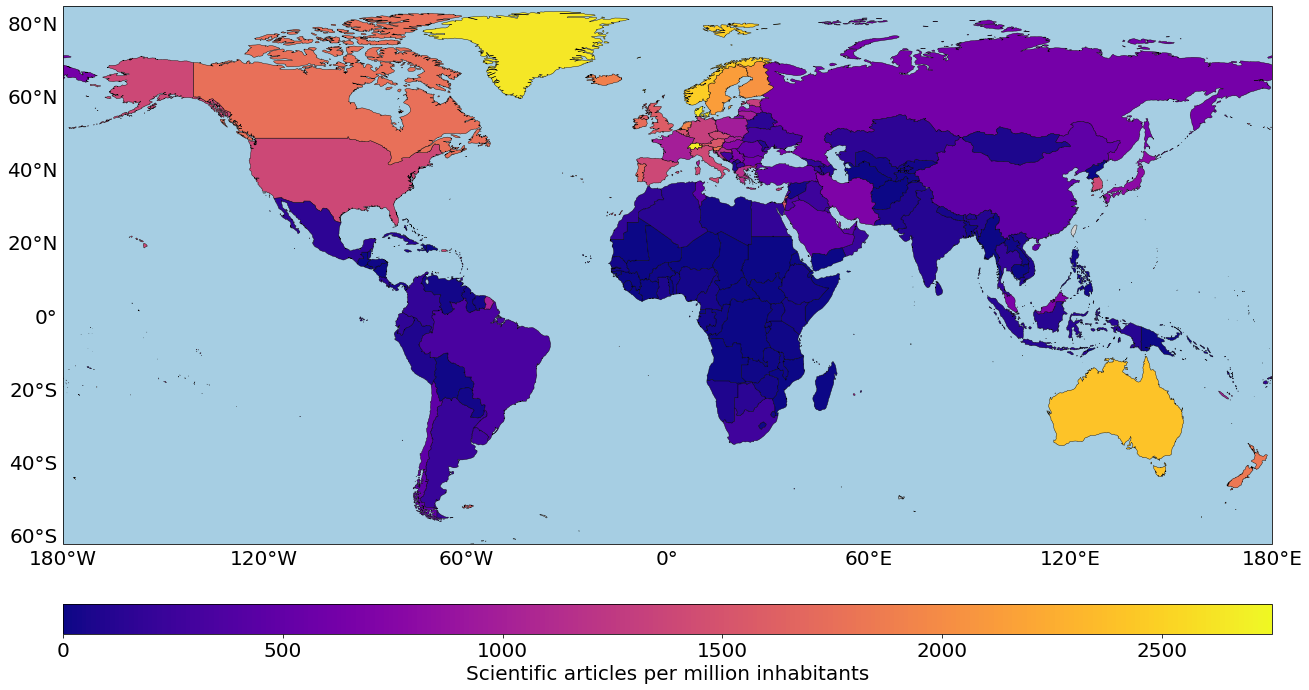

Sin datos: 3 países


,Name,Scientific articles per million inhabitants
SVN_A3,,
TCD,Chad,0.882304
TKM,Turkmenistan,0.925600
GNQ,Equatorial Guinea,1.253700
SSD,South Sudan,1.289989
AGO,Angola,1.426852
COD,Congo (Democratic Republic of the),1.979017
LBR,Liberia,2.444619
SLV,El Salvador,2.629559
NER,Niger,2.730504


In [50]:
# Scientific articles per million inhabitants
id = "IP.JRN.ARTC.SC"
i = 1

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]
df["POP_EST"] = borders["POP_EST"]
df[vars[i]] = df[vars[i]] / df["POP_EST"] * 1e6

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
# borders[vars[i]].dropna().sort_values()
min = 0
max = 2750
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

min: 0.47041153170111133, max: 2.5880698619279876


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Young workforce ratio (20-39 to 40-65 years old))
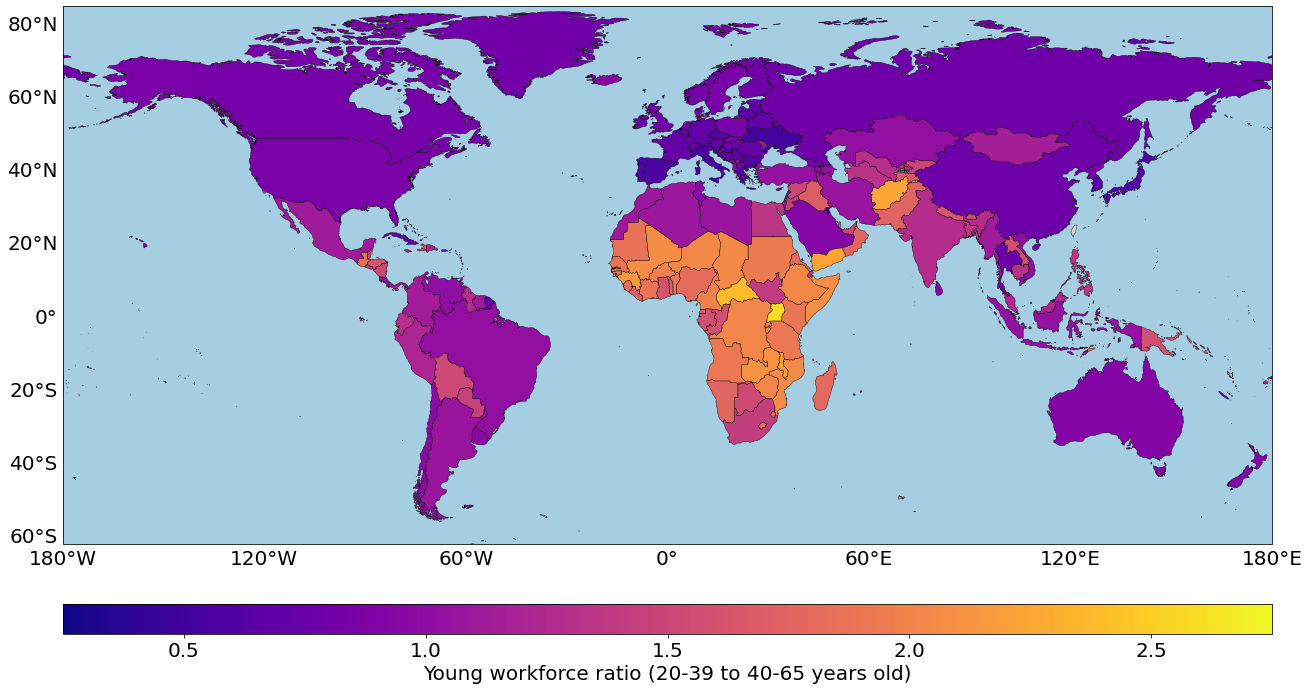

Sin datos: 1 países


,Name,Young workforce ratio (20-39 to 40-65 years old)
SVN_A3,,
KWT,Kuwait,0.470412
SMR,San Marino,0.503187
UKR,Ukraine,0.529814
ITA,Italy,0.569130
ESP,Spain,0.583726
GRC,Greece,0.593756
AND,Andorra,0.597261
JPN,Japan,0.605144
MCO,Monaco,0.608179


In [51]:
# Cargamos el archivo de población
id = "Population"

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], index_col = "Country Code")
df_i.index.name = ix

v_pop = [
    "SP.POP.2024.FE", "SP.POP.2024.MA", "SP.POP.2529.FE",
    "SP.POP.2529.MA", "SP.POP.3034.FE", "SP.POP.3034.MA",
    "SP.POP.3539.FE", "SP.POP.3539.MA", "SP.POP.4044.FE",
    "SP.POP.4044.MA", "SP.POP.4549.FE", "SP.POP.4549.MA",
    "SP.POP.5054.FE", "SP.POP.5054.MA", "SP.POP.5559.FE",
    "SP.POP.5559.MA", "SP.POP.6064.FE", "SP.POP.6064.MA" 
    ]
for v in v_pop:
    df[v] = df_i.loc[ df_i["Indicator Code"] == v, "2023" ]

# Young workforce
i = 2

df[vars[i]] = df[v_pop[0:8]].sum(axis = 1) / df[v_pop[8:]].sum(axis = 1)

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
# Eliminamos Lietchtenstein por motivos de visualización
#borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
# borders[vars[i]].dropna().sort_values()
min = 0.25
max = 2.75
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

min: 0.009, max: 0.82


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Gender inequality index)
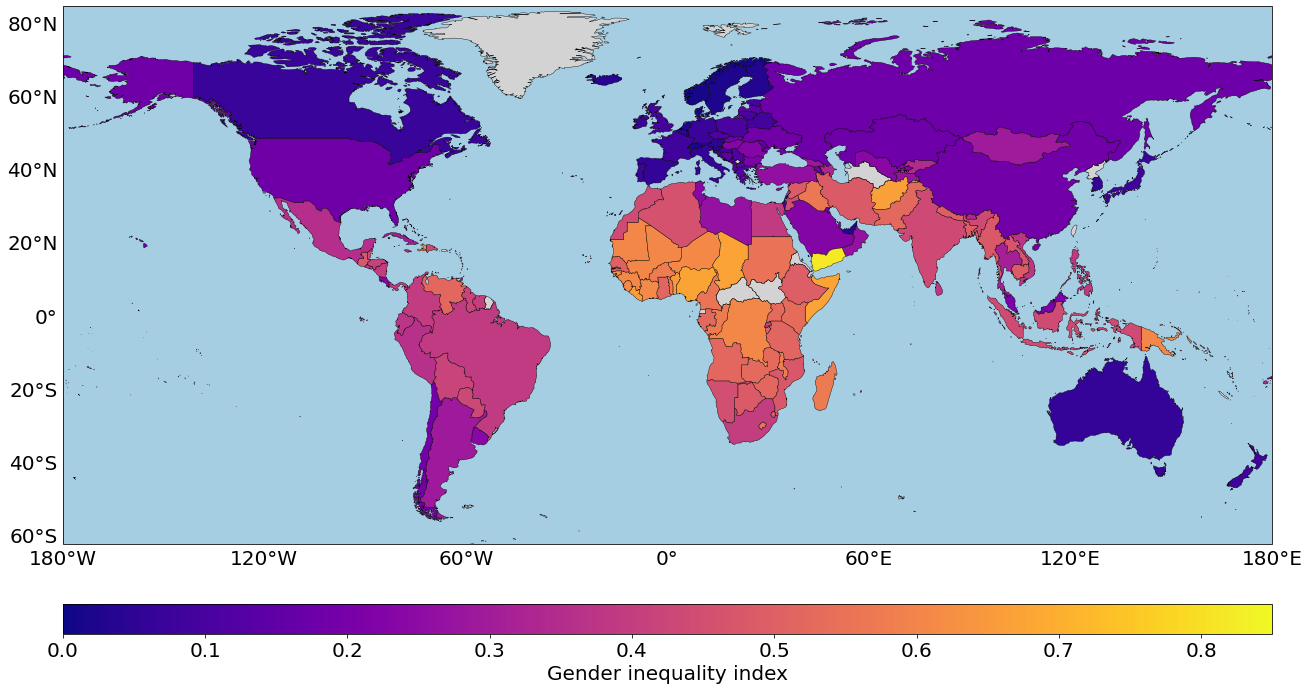

Sin datos: 75 países


,Name,Gender inequality index
SVN_A3,,
DNK,Denmark,0.009
NOR,Norway,0.012
CHE,Switzerland,0.018
SWE,Sweden,0.023
NLD,Netherlands,0.025
FIN,Finland,0.032
ARE,United Arab Emirates,0.035
SGP,Singapore,0.036
ISL,Iceland,0.039


In [52]:
# Gender inequality index
i = 3

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
# Eliminamos Mónaco por motivos de visualización
#borders.loc["MCO"] = np.nan
print(f"min: {borders[vars[i]].min()}, max: {borders[vars[i]].max()}")
# borders[vars[i]].dropna().sort_values()
min = 0
max = 0.85
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más bajos
df[ ["Name", vars[i] ] ].sort_values(vars[i]).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Total debt service [% of GNI])
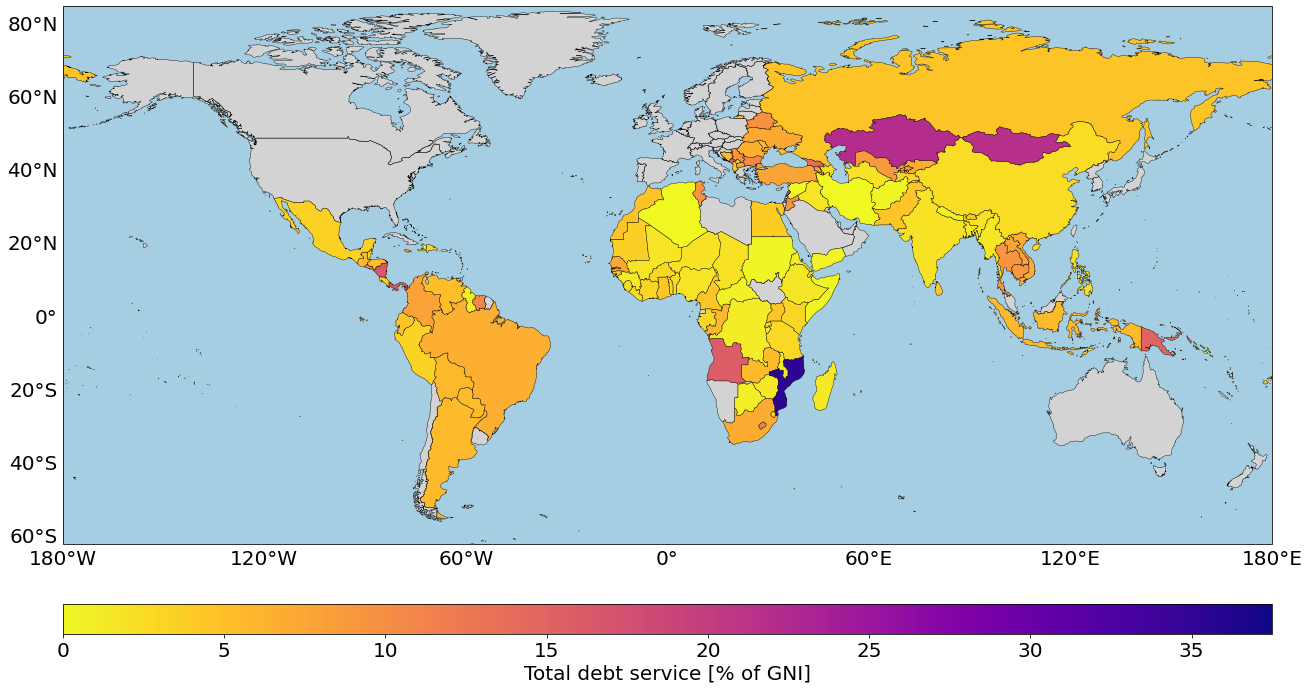

Sin datos: 116 países


,Name,Total debt service [% of GNI]
SVN_A3,,
MOZ,Mozambique,35.564801
KAZ,Kazakhstan,22.094875
MNG,Mongolia,21.547483
LBN,Lebanon,20.940254
NIC,Nicaragua,16.571052
PAN,Panama,16.362585
AGO,Angola,15.900413
MNE,Montenegro,15.794174
PNG,Papua New Guinea,14.941915


In [53]:
# Total debt service [% of GNI]
id = "DT.TDS.DECT.GN.ZS"
i = 4

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 10 * np.floor( borders[vars[i]].min() * 0.1 )
max = 37.5#10 * np.ceil( borders[vars[i]].max() * 0.1 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df[ ["Name", vars[i] ] ].sort_values(vars[i], ascending = False).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Central government debt [% of GDP])
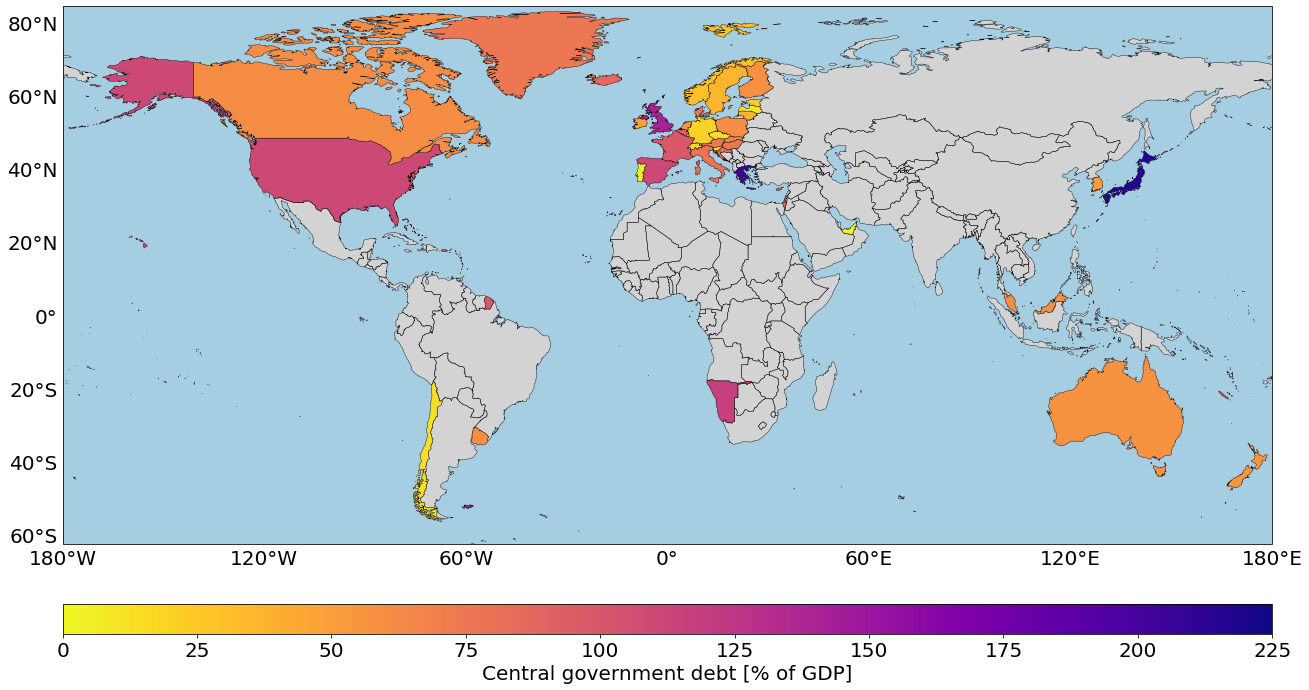

Sin datos: 146 países


,Name,Central government debt [% of GDP]
SVN_A3,,
JPN,Japan,216.213375
GRC,Greece,203.285809
SGP,Singapore,150.141913
BRB,Barbados,146.460053
GBR,United Kingdom,142.283042
GBR,Jersey,142.283042
GBR,Guernsey,142.283042
GBR,Isle of Man,142.283042
GBR,Falkland Islands,142.283042


In [54]:
# Central government debt [% of GDP]
id = "GC.DOD.TOTL.GD.ZS"
i = 5

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0], skiprows = 3
    ).rename( columns = {"Country Code": ix} ).set_index(ix)
df = df.reset_index().set_index("SVN_A3")
df[vars[i]] = df_i.iloc[ :, 4:-1 ].ffill(axis = 1).iloc[:, -1]
df[vars[i]] = df[vars[i]].where( df[vars[i-1]].isnull(), np.nan )

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 10 * np.floor( borders[vars[i]].min() * 0.1 )
max = 225#np.ceil( borders[vars[i]].max() )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df[ ["Name", vars[i] ] ].sort_values(vars[i], ascending = False).head(10)

:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Gini coefficient)
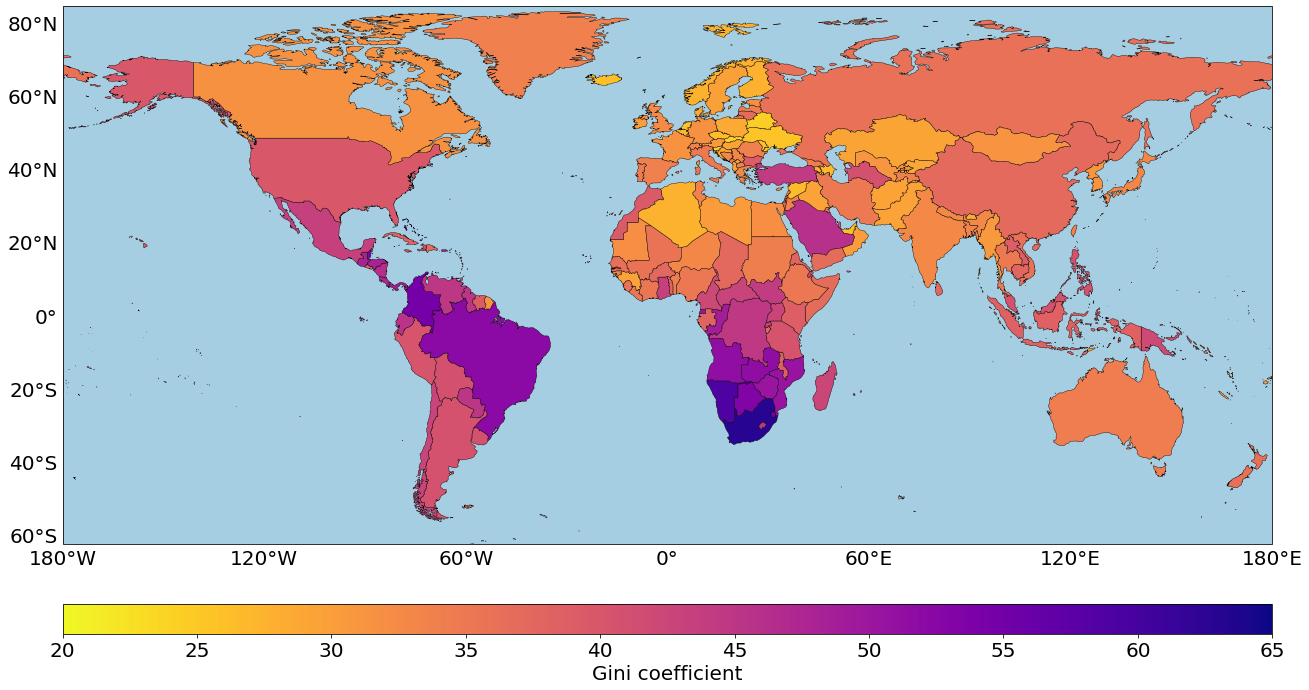

Sin datos: 0 países


,Name,Gini coefficient
ISO_A3,,
FRO,Faroe Islands,22.7
VGB,British Virgin Islands,23.0
SVK,Slovakia,24.1
SVN,Slovenia,24.3
BLR,Belarus,24.4
UKR,Ukraine,25.6
ALA,Aland,25.6
NLD,Netherlands,25.7
MDA,Moldova (Republic of),25.7


In [55]:
# Gini coefficient
id = "SI.POV.GINI"
i = 6

# Cargamos el archivo
df_i = pd.read_csv( "../../" + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0][:-4] + "_extra.csv",
    skiprows = 4 ).rename( columns = {"Country Code": ix}
    ).drop(columns = ["Source"])
df = df.reset_index().set_index(ix)
df[vars[i]] = df_i.set_index(ix).iloc[ :, 4: ].ffill(axis = 1).iloc[:, -1]

# Mapa
borders[vars[i]] = df.reset_index().set_index(ix)[vars[i]]
min = 5 * np.floor( borders[vars[i]].min() * 0.2 )
max = 5 * np.ceil( borders[vars[i]].max() * 0.2 )
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(vars[i], range = (min, max) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# Países sin datos
print( f"Sin datos: {df[ df[vars[i]].isnull() ].shape[0]} países" )
# 10 países más altos
df[ ["Name", vars[i] ] ].sort_values(vars[i], ascending = True).head(10)

In [59]:
df[ df[vars].count(axis = 1) > 4 ]

,SVN_A3,Name,HDI,GDI,Mean years of schooling,Life expectancy at birth,GNI per capita,Gender inequality index,Scientific articles per million inhabitants,POP_EST,...,SP.POP.5054.FE,SP.POP.5054.MA,SP.POP.5559.FE,SP.POP.5559.MA,SP.POP.6064.FE,SP.POP.6064.MA,Young workforce ratio (20-39 to 40-65 years old),Total debt service [% of GNI],Central government debt [% of GDP],Gini coefficient
ISO_A3,,,,,,,,,,,,,,,,,,,,,
QAT,QAT,Qatar,0.875,1.027,10.1,81.6,95944.0,0.212,828.592685,2832067.0,...,32796.0,117226.0,21114.0,66147.0,13533.0,37814.0,1.490668,NaN,NaN,41.1
SGP,SGP,Singapore,0.949,0.991,11.9,84.1,88761.0,0.036,2142.726773,5703569.0,...,225789.0,253206.0,218510.0,250030.0,216285.0,250580.0,0.703765,NaN,150.141913,45.9
IRL,IRL,Ireland,0.950,0.991,11.7,82.7,87468.0,0.072,1732.849750,4941444.0,...,178476.0,176443.0,158420.0,154810.0,144316.0,139578.0,0.750480,NaN,46.714242,30.1
LUX,LUX,Luxembourg,0.927,0.993,13.0,82.6,78554.0,0.043,1527.578820,619896.0,...,23209.0,24634.0,22560.0,24609.0,19577.0,20421.0,0.816144,NaN,2.901345,32.7
ARE,ARE,United Arab Emirates,0.937,0.986,12.8,79.2,74104.0,0.035,454.757363,9770529.0,...,127864.0,389625.0,80902.0,225655.0,51194.0,113096.0,1.535701,NaN,1.845685,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,YEM,Yemen,0.424,0.456,2.8,63.7,1106.0,0.820,9.690719,29161922.0,...,469745.0,460174.0,360885.0,337401.0,270617.0,238430.0,2.224595,0.530089,NaN,36.7
COD,COD,Congo (Democratic Republic of the),0.481,0.891,7.2,59.7,1080.0,0.605,1.979017,86790567.0,...,1388166.0,1303910.0,1135077.0,1044584.0,883285.0,793144.0,2.010428,1.089154,NaN,44.7
SOM,SOM,Somalia,0.380,0.769,1.9,56.1,1072.0,0.674,3.211242,10192317.3,...,227418.0,213393.0,185043.0,167048.0,147092.0,129087.0,2.083772,0.188488,NaN,36.8


:Overlay
   .Polygons.I  :Polygons   [Longitude,Latitude]   (min_zoom)
   .Polygons.II :Polygons   [Longitude,Latitude]   (Socioeconomic vulnerability index)
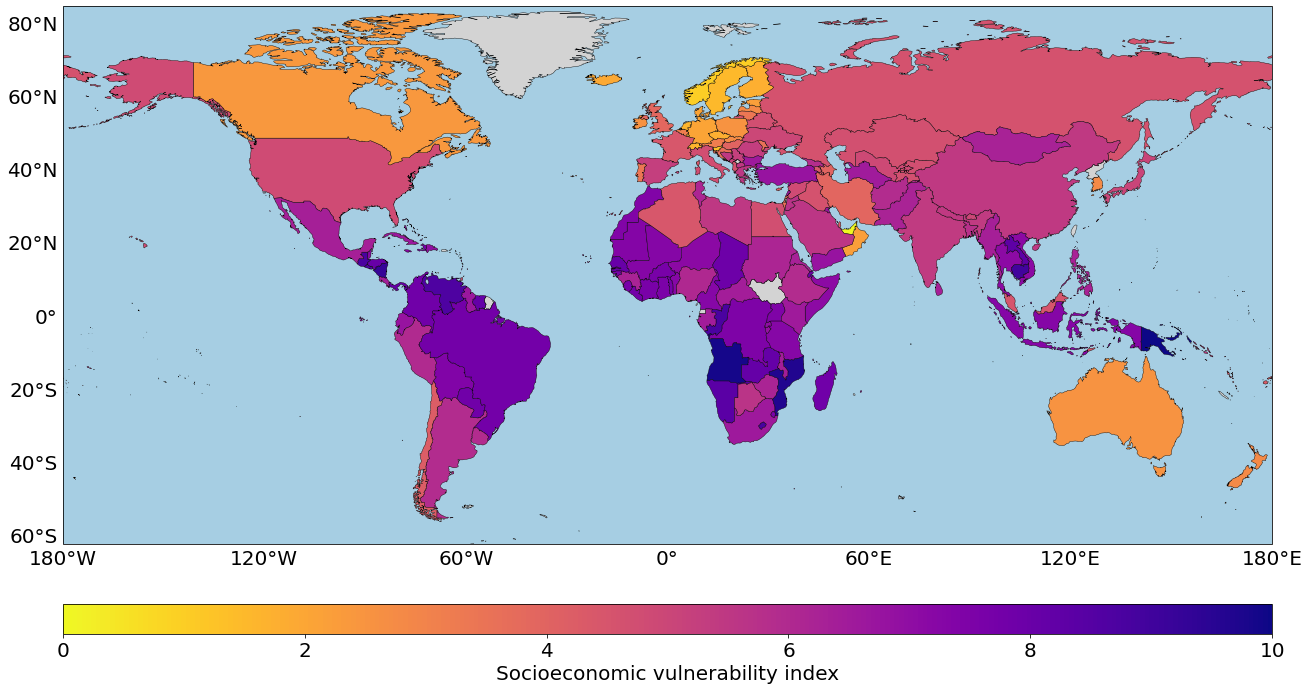

,Name,Socioeconomic vulnerability index,Mean years of schooling_index,Scientific articles per million inhabitants_index,Young workforce ratio (20-39 to 40-65 years old)_index,Gender inequality index_index,Total debt service [% of GNI]_index,Central government debt [% of GDP]_index,Gini coefficient_index
ISO_A3,,,,,,,,,
PNG,Papua New Guinea,10.000000,8.606557,8.852459,2.841530,9.096386,9.354839,NaN,7.704918
AGO,Angola,9.858975,7.950820,9.836066,1.147541,8.012048,9.516129,NaN,9.453552
MOZ,Mozambique,9.656796,9.125683,9.071038,0.491803,7.108434,10.000000,NaN,9.344262
NIC,Nicaragua,9.249711,6.803279,9.016393,3.278689,5.843373,9.677419,NaN,8.961749
KHM,Cambodia,8.978081,8.442623,8.196721,4.262295,7.349398,8.387097,NaN,5.901639
LSO,Lesotho,8.803123,6.557377,7.595628,1.530055,8.493976,9.112903,NaN,8.579235
COG,Congo,8.787957,6.147541,7.814208,2.950820,8.674699,7.016129,NaN,9.207650
GTM,Guatemala,8.756010,8.087432,8.743169,1.748634,7.048193,6.935484,NaN,9.125683
VEN,Venezuela (Bolivarian Republic of),8.697359,4.808743,7.322404,6.284153,8.072289,6.451613,NaN,8.524590


In [62]:
# Índice de vulnerabilidad socioeconómica
index_n = "Socioeconomic vulnerability index"

# Índice por unidad geográfico ISO-3166-1
df = df.reset_index().set_index(ix)

# Cálculo del índice para cada categoría
var_i = [v + "_index" for v in vars]
# Países con al menos 4 valores
df = df[ df[vars].count(axis = 1) > 3 ]
# Normalización 0-10
for i, v in enumerate(vars):
    df[ var_i[i] ] = stats.percentileofscore( df[ vars[i] ],
        df[ vars[i] ], nan_policy = "omit" ) / 10
    #min_v = df[v].min()
    #max_v = df[v].max()
    #rng_v = max_v - min_v
    #df[ var_i[i] ] = 10 * ( df[v] - min_v ) / rng_v
    if v in vars[0:3]: df[ var_i[i] ] = 10 - df[ var_i[i] ]

# Cálculo del índice
df[index_n] = df[var_i].mean(axis = 1)
# Normalización 0-10
min_v = df[index_n].min()
max_v = df[index_n].max()
rng_v = max_v - min_v
df[ index_n ] = 10 * ( df[index_n] - min_v ) / rng_v

# Guardamos el archivo
df.to_csv(path_r + "socioeconomic_index.csv")

# Mapa
borders[index_n] = df[index_n]
map_v = gv.Polygons( borders,
    vdims = gv.Dimension(index_n, range = (0, 10.0001) )
    ).opts( cmap = "plasma_r", **options )
map = ( ocean * map_v ).opts( **options_m )
gv.output( map, size = 600 )

# 10 países más altos
df[["Name", index_n] + var_i].sort_values(index_n, ascending = False).head(10)